1. Title: Zoo database

      Class# Set of animals:
      ====== ===============================================================
           1 (41) aardvark, antelope, bear, boar, buffalo, calf,
                  cavy, cheetah, deer, dolphin, elephant,
                  fruitbat, giraffe, girl, goat, gorilla, hamster,
                  hare, leopard, lion, lynx, mink, mole, mongoose,
                  opossum, oryx, platypus, polecat, pony,
                  porpoise, puma, pussycat, raccoon, reindeer,
                  seal, sealion, squirrel, vampire, vole, wallaby,wolf
           2 (20) chicken, crow, dove, duck, flamingo, gull, hawk,
                  kiwi, lark, ostrich, parakeet, penguin, pheasant,
                  rhea, skimmer, skua, sparrow, swan, vulture, wren
           3 (5)  pitviper, seasnake, slowworm, tortoise, tuatara 
           4 (13) bass, carp, catfish, chub, dogfish, haddock,
                  herring, pike, piranha, seahorse, sole, stingray, tuna
           5 (4)  frog, frog, newt, toad 
           6 (8)  flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp
           7 (10) clam, crab, crayfish, lobster, octopus,
                  scorpion, seawasp, slug, starfish, worm

5. Number of Instances: 101

6. Number of Attributes: 18 (animal name, 15 Boolean attributes, 2 numerics)

7. Attribute Information: (name of attribute and type of value domain)

  01. animal name:  Unique for each instance
  02. hair		    Boolean
  03. feathers		Boolean
  04. eggs		    Boolean
  05. milk		    Boolean
  06. airborne		Boolean
  07. aquatic		Boolean
  08. predator		Boolean
  09. toothed		Boolean
  10. backbone		Boolean
  11. breathes		Boolean
  12. venomous		Boolean
  13. fins		    Boolean
  14. legs		    Numeric (set of values: {0,2,4,5,6,8})
  15. tail		    Boolean
  16. domestic		Boolean
  17. catsize		Boolean
  18. type		    Numeric (integer values in range [1,7])

8. Missing Attribute Values: None
9. Class Distribution: Given above
   

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import metrics

# ML Algorithms
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

/home/wishwa/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
df=pd.read_csv("./zoo/zoo.data") #load train data
df.shape
dfCopy = df.copy() # make train data copies


In [15]:
dfCopy.columns = ['name', 'hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']
dfCopy.head(5)

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


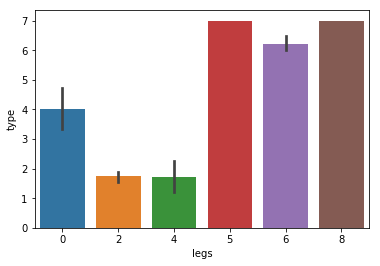

In [16]:
sns.barplot(x='legs', y='type', data=dfCopy)

### Since there are no missing values or any redundencies in the Dataset, No preprocessing part needed

In [32]:
feature_col_names=['hair','feathers','eggs','milk',
                   'airborne','aquatic','predator','toothed','backbone','breathes',
                   'venomous','fins','legs','tail','domestic','catsize','type']
predicted_class_name=['type']
X=dfCopy[feature_col_names]
y=dfCopy[predicted_class_name]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=42)

In [33]:


rf_model = RandomForestClassifier()      # Create random forest object
rf_model.fit(X_train, y_train)

rf_predict_train = rf_model.predict(X_train)

# training metrics
rf_predict_test = rf_model.predict(X_test)

print('Model Performance')

# training metrics
print("Test data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Model Performance
Test data Accuracy: 1.0000


/home/wishwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [34]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.5, random_state=42)
lr_model.fit(X_train, y_train)
lr_predict_train = lr_model.predict(X_train)
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Test Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

Test Accuracy: 0.9000


/home/wishwa/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
